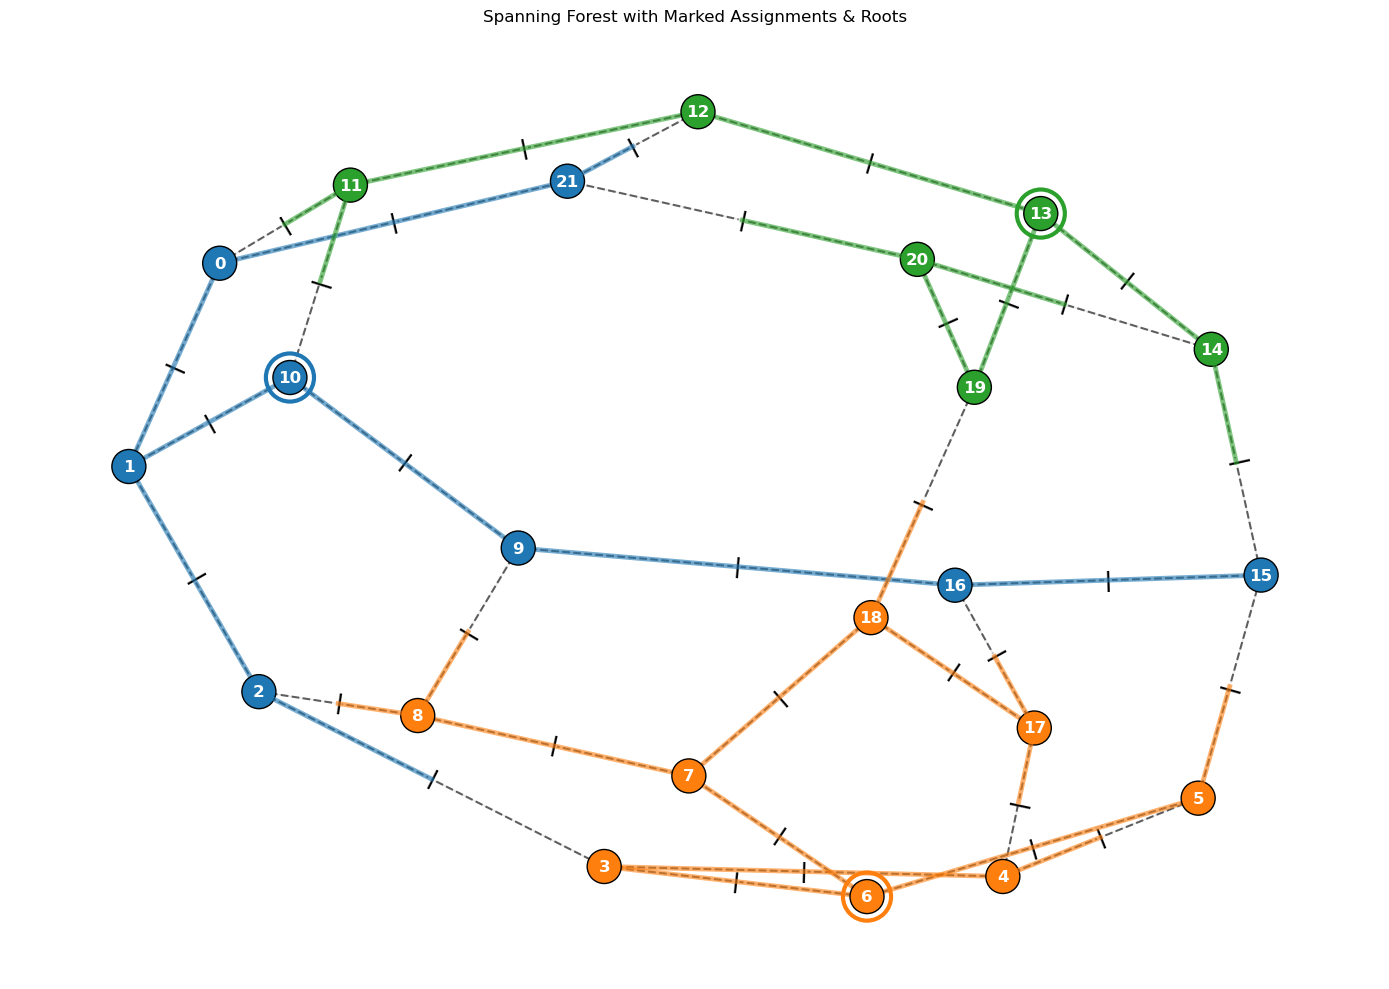

In [8]:
import stim

from spidercat.draw import draw_spanning_forest_solution
from spidercat.spanning_tree import find_min_height_roots
from spidercat.utils import load_solution_triplet, ed

grf, forest, M, matchings = load_solution_triplet(33, 3, 3)
roots = find_min_height_roots(forest)

draw_spanning_forest_solution(grf, forest, M, matchings, roots)

In [9]:
from spidercat.circuit_extraction import extract_circuit_rooted

M = {ed(*k): v for k, v in M.items()}
print("M:", M)
print("matchings:", matchings)
circ = extract_circuit_rooted(grf, forest, roots, M, matchings, verbose=True)
print(circ)
circ.diagram('timeline-svg')

M: {(0, 21): 1, (0, 1): 1, (0, 11): 1, (1, 2): 1, (1, 10): 1, (2, 3): 1, (2, 8): 1, (3, 4): 1, (3, 6): 1, (4, 5): 1, (4, 17): 1, (5, 6): 1, (5, 15): 1, (6, 7): 1, (7, 8): 1, (7, 18): 1, (8, 9): 1, (9, 10): 1, (9, 16): 1, (10, 11): 1, (11, 12): 1, (12, 13): 1, (12, 21): 1, (13, 14): 1, (13, 19): 1, (14, 15): 1, (14, 20): 1, (15, 16): 1, (16, 17): 1, (17, 18): 1, (18, 19): 1, (19, 20): 1, (20, 21): 1}
matchings: {2: [(2, 3)], 4: [(4, 5)], 5: [(5, 15)], 8: [(2, 8), (8, 9)], 11: [(0, 11), (10, 11)], 14: [(14, 15)], 17: [(4, 17), (16, 17)], 20: [(14, 20), (20, 21)], 21: [(12, 21)], 18: [(18, 19)]}
=== Starting Clean Extraction ===
  Estimated Data Qubits: 33
  Flags start at: 33
Init Root 10 (Tree 0) -> Q0
    Link (10, 11) (1st visit): Created Flag 33, CNOT 0->33
  Node 10 -> Branch 9 (New Q1)
    Internal Mark (9, 10): Added Q2
    Link (8, 9) (1st visit): Created Flag 34, CNOT 1->34
  Node 9 -> Primary 16 (Inherits Q1)
    Internal Mark (9, 16): Added Q3
    Link (16, 17) (1st visit): Cr

ValueError: The two qubit gate CX was applied to a target pair with the same target (33) twice. Gates can't interact targets with themselves.

In [3]:
from spidercat.circuit_extraction import make_stim_circ_noisy

# noisy_circ = make_stim_circ_noisy(circ, p_init=0.01, p_meas=0.01)

circ.append("M", range(sum(M.values())))
sampler = circ.compile_sampler()
samples = sampler.sample(100)
print(samples[:5])
converter = circ.compile_m2d_converter()
detectors = converter.convert(measurements=samples, append_observables=False)
error_detected = np.any(detectors, axis=1)
print(detectors[:5])
print(error_detected[:5])

[[ True  True  True  True False False False False False False]
 [False False False False  True  True  True  True  True  True]
 [False False False False  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [False False False False  True  True  True  True  True  True]]
[[False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]]
[False False False False False]


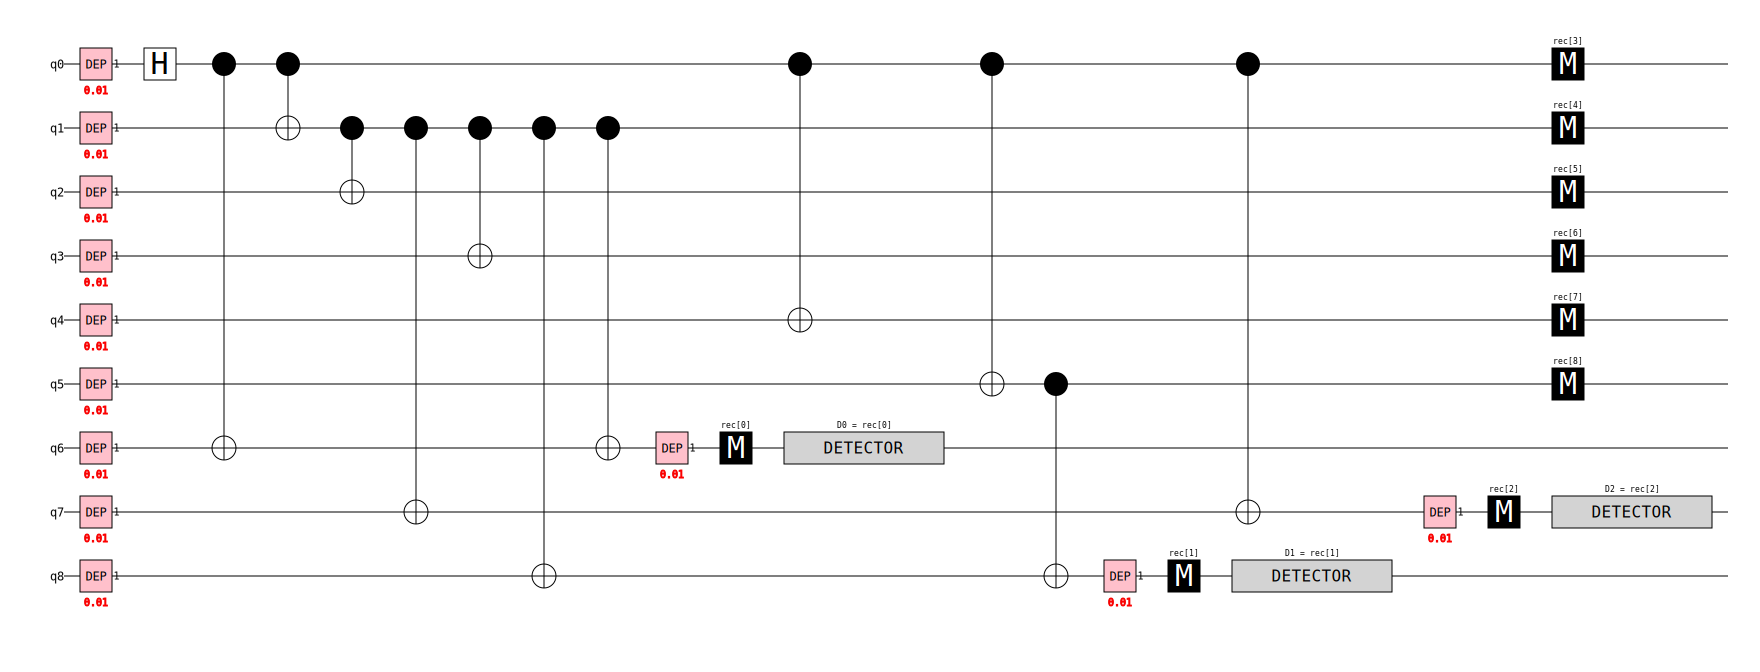

In [4]:
noisy_circ.diagram('timeline-svg')

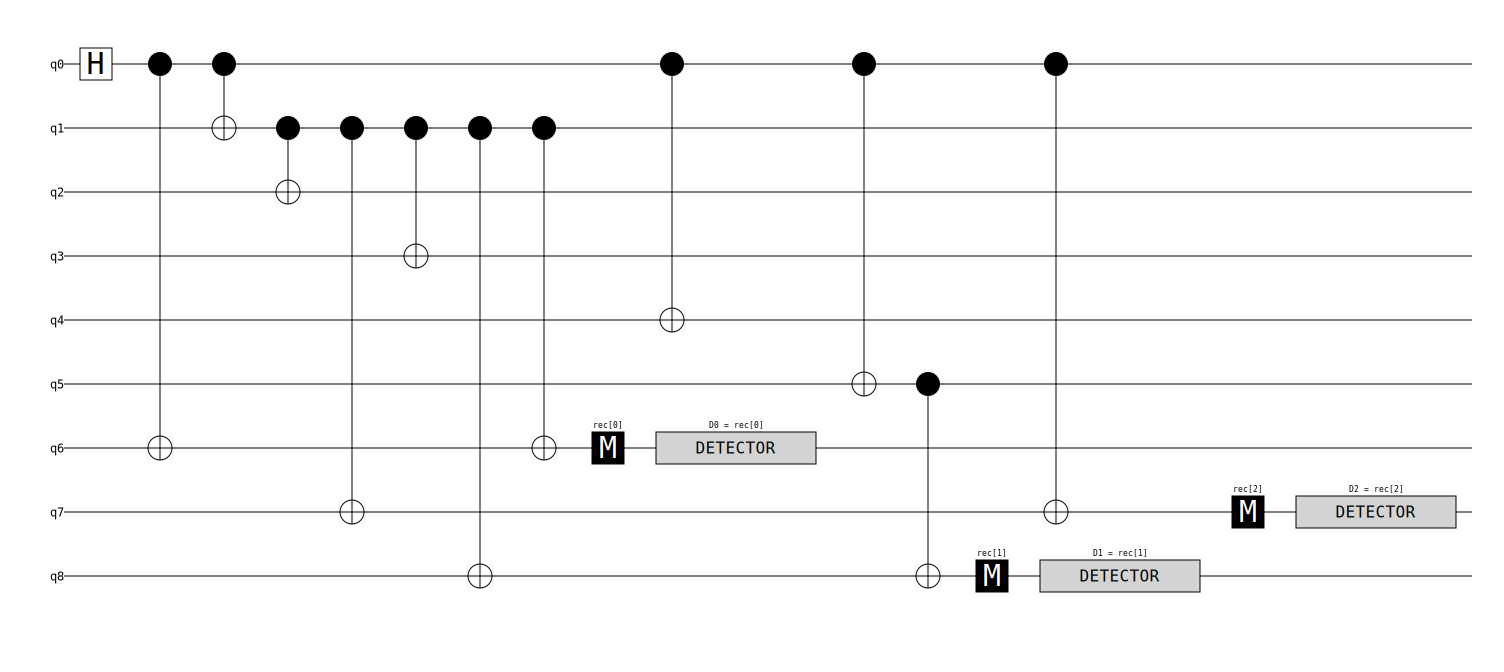

In [5]:
circ.diagram('timeline-svg')

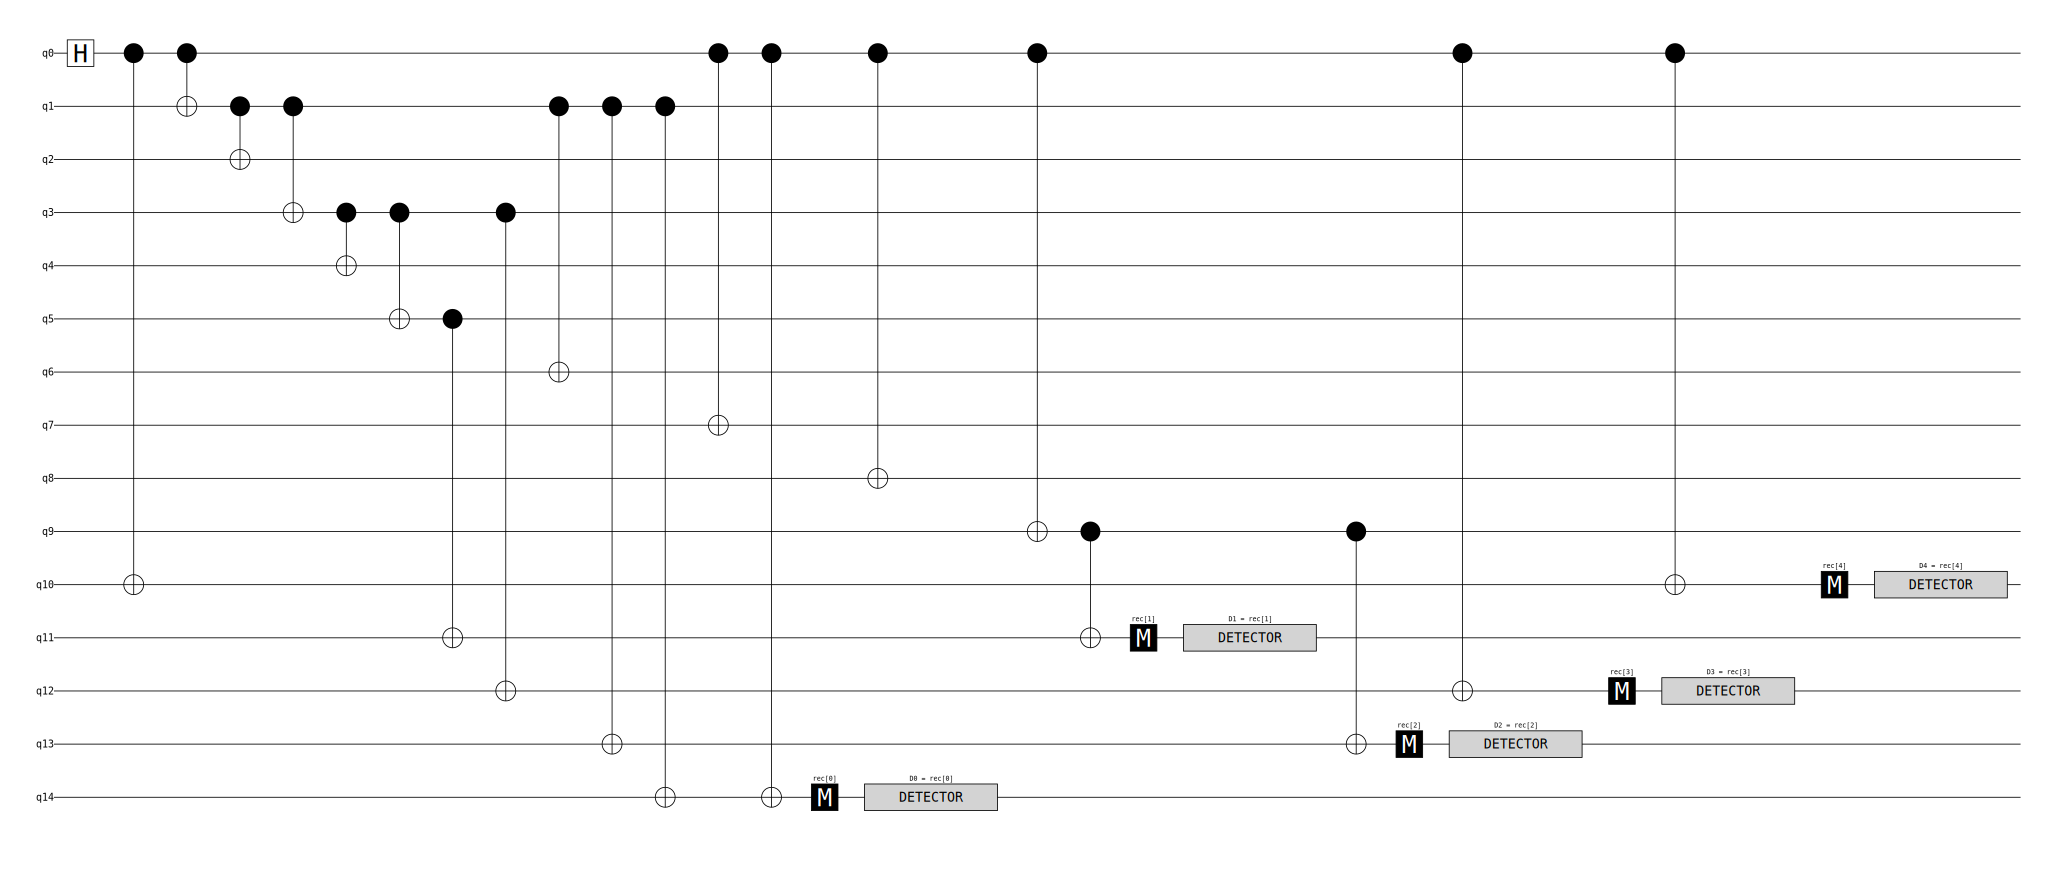

In [6]:
circ = stim.Circuit("""
H 0
CX 0 10 0 1 1 2 1 3 3 4 3 5 5 11 3 12 1 6 1 13 1 14 0 7 0 14
M 14
DETECTOR rec[-1]
CX 0 8 0 9 9 11
M 11
DETECTOR rec[-1]
CX 9 13
M 13
DETECTOR rec[-1]
CX 0 12
M 12
DETECTOR rec[-1]
CX 0 10
M 10
DETECTOR rec[-1]
""")
circ.diagram('timeline-svg')

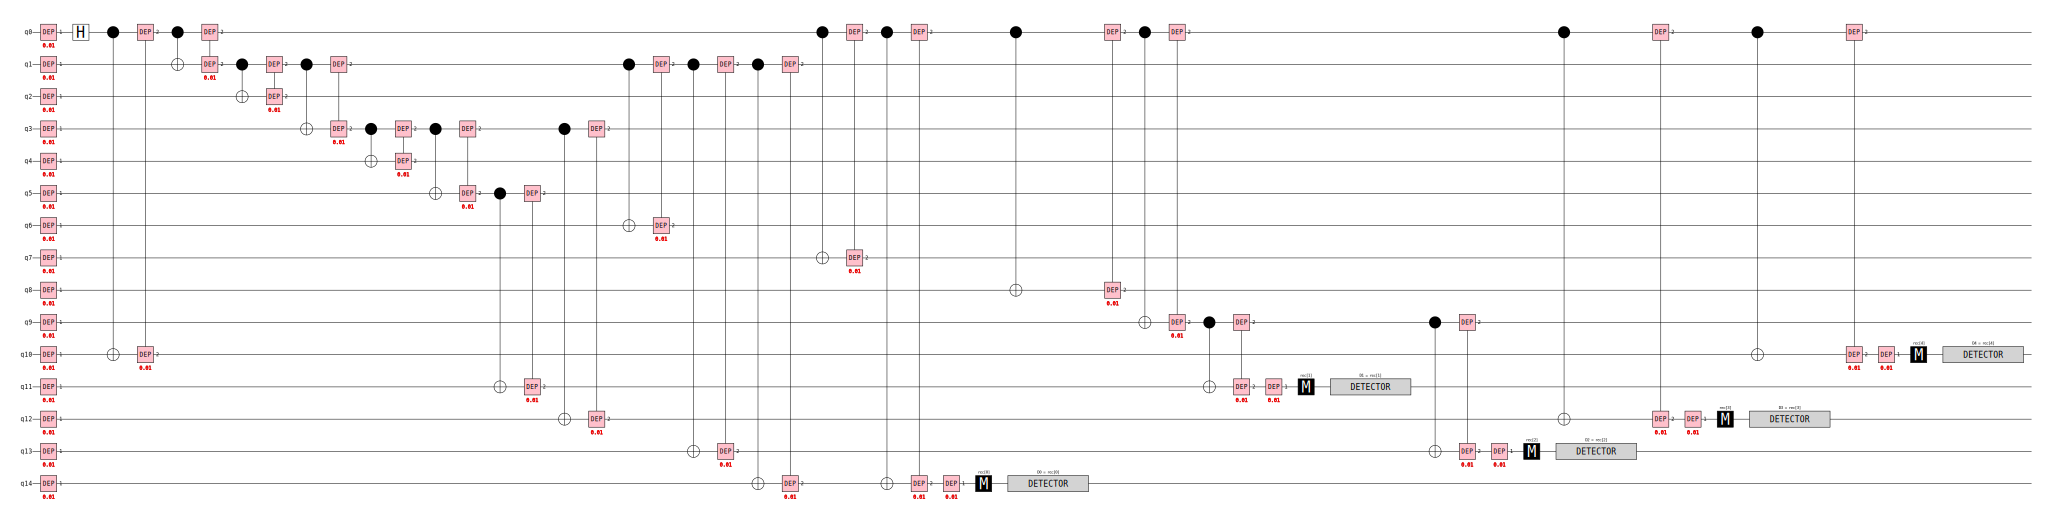

In [9]:
noisy_circ = make_stim_circ_noisy(circ, p_init=0.01, p_meas=0.01, p_2=0.01)
noisy_circ.diagram('timeline-svg')